In [41]:
import tweepy
import networkx as nx
import pandas as pd
import operator
import matplotlib.pyplot as plt

# Load data and authenticate

In [58]:
consumer_key='gKoU0sJYucJWfyKhHV94gAvlL'
consumer_secret='iYwyu3EYglYJVSGuKb6bJu49RoCZON9ruuoa6N5FldYlcxtHnH'
access_token='1636250282-iZwdao53UDL4GEExjdyNGOWLug6wPUbc9hMNotO'
access_token_secret='IswJJm5emSMvSvG6nyYgaRj8nFCJDxSO6emOzEC9LFrQc'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)
g=create_graph()

In [34]:
core = trim_degrees(g)
core3 = trim_degrees(g, 3)
core10 = trim_degrees(g, 10)

# Centrality Measures

### Degree Centrality
- Whoever has the most edges going in/out of a node

In [39]:
deg = dict(nx.degree(g))
ds=sorted_map(deg)
ds[-10:]

[('767487035942854656', 2944),
 ('1033345424', 3029),
 ('716096945232609281', 3836),
 ('825459914927644672', 3844),
 ('21558596', 5002),
 ('131171690', 5002),
 ('1087935230', 5003),
 ('736905775', 5005),
 ('3365345831', 5006),
 ('66485304', 5006)]

### Closeness Centrality
- Measure of closeness to all other nodes
- Indicates ability to move information across the network quickly
- For every node:
 - Compute avg. distance to all other nodes
 - Divide by max distance
 - Closeness = 1/avg distance

In [69]:
c=nx.closeness_centrality(core10)
cs=sorted_map(c)

(array([ 1.,  0.,  0.,  0.,  0.,  0.,  0., 41.,  7.,  2.,  1.,  1.,  1.,
         2.,  3.,  0.,  0.,  0.,  0.,  0.,  0.,  2.,  4.,  2.,  2.,  3.,
         7.,  4.,  4., 11., 10.,  9., 17., 19., 20., 20., 37., 39., 36.,
        46., 59., 59., 65., 80., 76., 80., 79., 64., 60., 59., 42., 27.,
        15.,  7., 10., 10.,  8., 11.,  9., 11.,  6.,  9.,  6.,  5.,  5.,
         5.,  8.,  4.,  8.,  5.,  6.,  1.,  3.,  4.,  3.,  5.,  4.,  1.,
         3.,  2.,  2.,  3.,  3.,  0.,  0.,  4.,  0.,  0.,  0.,  0.,  0.,
         1.,  1.,  1.,  1.,  1.,  0.,  0.,  0.,  2.]),
 array([0.33715776, 0.34038312, 0.34360848, 0.34683384, 0.3500592 ,
        0.35328456, 0.35650992, 0.35973529, 0.36296065, 0.36618601,
        0.36941137, 0.37263673, 0.37586209, 0.37908745, 0.38231281,
        0.38553818, 0.38876354, 0.3919889 , 0.39521426, 0.39843962,
        0.40166498, 0.40489034, 0.4081157 , 0.41134107, 0.41456643,
        0.41779179, 0.42101715, 0.42424251, 0.42746787, 0.43069323,
        0.43391859, 0.4371

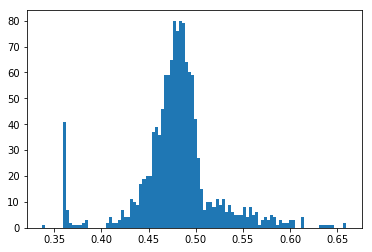

In [73]:
plt.hist(dict(cs).values(), 100)

In [71]:
print(get_user_list(dict(cs[-10:]).keys()))

['amyy_jarvis', 'happy_HALidays', 'ayyyemytesch_', 'carrollvarsity', 'metcalf__sarah', '_ryanwalsh_', 'carolineefrock', 'paige_sedlar', 'oliviaa_whitee', 'ryan_mcmanus9']


### Betweeness Centrality
- Individual may have power if they preside over communication bottleneck
- Identify boundary spanners
- For every node:
 - Compute shortest path to every other node (dijsktras)
 - Count the number of shortest paths the node is on
 - Normalize results to 0-1

In [75]:
b=nx.betweenness_centrality(core10)
bs=sorted_map(b)

In [76]:
print(get_user_list(dict(bs[-10:]).keys()))

['sydpop88', 'metcalf__sarah', 'carolineefrock', '_ryanwalsh_', 'paige_sedlar', 'ryan_mcmanus9', 'meber5', 'carrollvarsity', 'stschoberg', 'oliviaa_whitee']


## Summary of Centrality Measures
### See table pg. 54 for summary

In [83]:
names1=(dict(ds[-10:]).keys())
names2=(dict(bs[-10:]).keys())
names3=(dict(cs[-10:]).keys())

names=(list(set(names1) | set(names2) | set(names3)))
table=[[get_user_by_id(name), deg[name], c[name], b[name]] for name in names]
pd.DataFrame(table, columns=["Name", "Degree", "Closeness", "Betweeness"])

,Name,Degree,Closeness,Betweeness
0,ryan_mcmanus9,862,0.659694,3.777231e-02
1,Tiaan191,5002,0.360871,0.000000e+00
2,_ryanwalsh_,849,0.638203,2.848736e-02
3,sydpop88,692,0.604488,2.259455e-02
4,not1ofyourfans,3029,0.361375,8.707127e-07
5,metcalf__sarah,856,0.634757,2.643273e-02
6,ayyyemytesch_,758,0.614252,2.126995e-02
7,DudeInABearSuit,5005,0.445095,8.287232e-05
8,happy_HALidays,1000,0.614252,1.938919e-02
9,Abovo42,5006,0.361173,5.986031e-07


### Eigenvector Centrality
- Measure of centrality by being connected to others who are central


# Cliques, Cluster, and Components

In [91]:
len(list(nx.connected_component_subgraphs(g)))

1

In [61]:
def get_user_list(lst):
    res=[]
    for p in lst:
        res.append(get_user_by_id((p)))
    return res 

In [32]:
def create_graph():
    g=nx.Graph()
    g=nx.read_pajek('immediate_friends_friends.net')
    return g
    

In [84]:
def sorted_map(map):
    ms = (sorted(map.items(), key=operator.itemgetter(1)))
    return (ms)

In [12]:
def trim_degrees(g, d=1):
    g2 = g.copy()
    deg = nx.degree(g2)
    
    for n in g.nodes():
        if deg[n] <= d: g2.remove_node(n)
    return g2

In [13]:
def get_following_list(user_name):
    return api.friends_ids(user_name)

In [14]:
def get_follower_list(user_name):
    try:
        return api.followers_ids(user_name)
    except tweepy.TweepError:
        print('Cant get data for '+str(get_user_by_id(user_name).name))
        return []

In [15]:
def get_user_by_id(key):
    return api.get_user(key).screen_name

In [16]:
def get_id_by_screen_name(n):
    return api.get_user(n).id

In [17]:
def add_friends_to_graph(user, friends_list):
    for friend in friends_list:
        g.add_edge(user, friends_list)

In [18]:
def add_followers_to_graph(user, friends_list):
    for friend in friends_list:
        g.add_edge(friends_list, user)

In [ ]:
def update_following_dict(user, d=following_dict):
    d[user] = get_following_list(user)
    return d   

In [ ]:
def update_follower_dict(user, d=follower_dict):
    d[user] = get_follower_list(user)
    return d

In [37]:
def write_graph(path, graph):
    nx.write_pajek(graph, path)

In [11]:
count=0
for k,v in follower_dict.items():
    for follower in v:
        count+=1
        g.add_edge(follower, k, t='follows')
print(count)

NameError: name 'follower_dict' is not defined